In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

Text(0, 0.5, 'Feature 1')

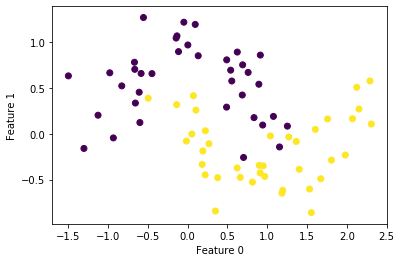

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
import mglearn

X, y = make_moons(n_samples=100, noise=0.25, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
xlim = plt.xlim()
ylim = plt.ylim()
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [4]:
xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
X_grid = np.c_[xx.ravel(), yy.ravel()]

In [5]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

1.0
0.84


Text(0, 0.5, 'Feature 1')

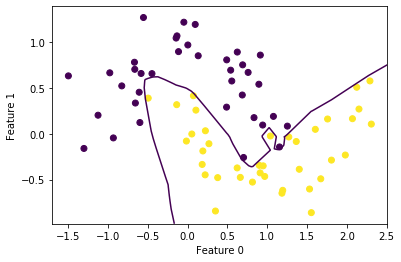

In [6]:
plt.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

1.0
0.84
1.0
0.84
1.0
0.84
1.0
0.84
1.0
0.88
1.0
0.92
1.0
0.88
0.9733333333333334
0.92
1.0
0.88


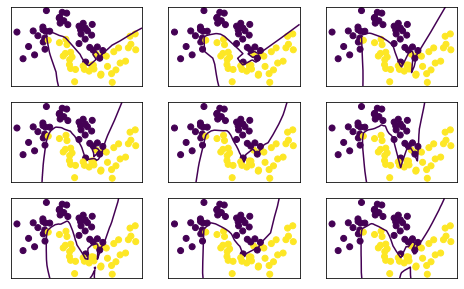

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(8, 5))
for ax, i in zip(axes.ravel(), range(10)):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,max_iter = 1000).fit(X_train, y_train)
    print(mlp.score(X_train, y_train))
    print(mlp.score(X_test, y_test))

    ax.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticks(())
    ax.set_yticks(())

In [8]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5), random_state=0)
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.9333333333333333
0.84


Text(0, 0.5, 'Feature 1')

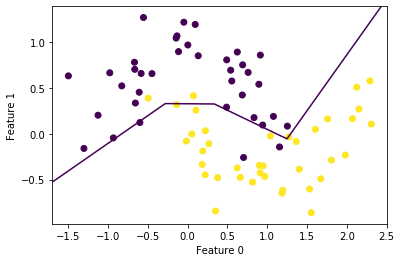

In [9]:
plt.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [10]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10, 10), random_state=0)
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.9733333333333334
0.88


Text(0, 0.5, 'Feature 1')

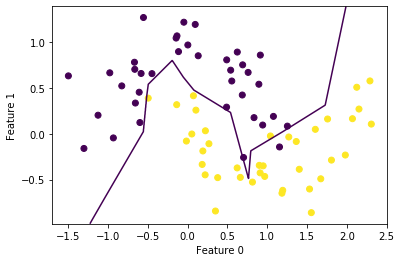

In [11]:
plt.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [12]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10, 10), activation="tanh", random_state=0)
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.9866666666666667
0.92


Text(0, 0.5, 'Feature 1')

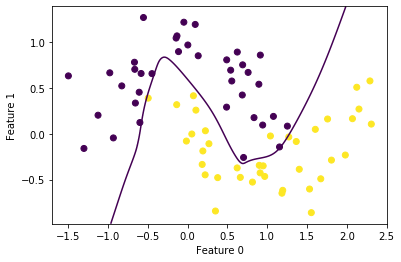

In [13]:
plt.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

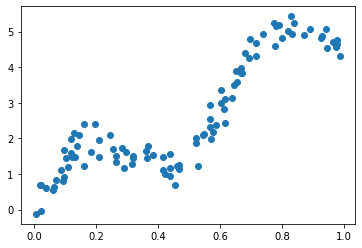

In [14]:
rng = np.random.RandomState(0)
x = np.sort(rng.uniform(size=100))
y = np.sin(10 * x) + 5 * x + np.random.normal(0, .3, size=100)
plt.plot(x, y, 'o')

In [15]:
line = np.linspace(0, 1, 100)
X = x.reshape(-1, 1)

In [16]:
from sklearn.neural_network import MLPRegressor
mlp_relu = MLPRegressor(solver="lbfgs", max_iter = 1000).fit(X, y)
mlp_tanh = MLPRegressor(solver="lbfgs", max_iter = 1000, activation='tanh').fit(X, y)

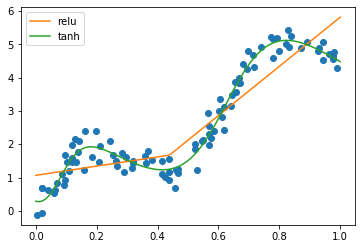

In [17]:
plt.plot(x, y, 'o')
plt.plot(line, mlp_relu.predict(line.reshape(-1, 1)), label="relu")
plt.plot(line, mlp_tanh.predict(line.reshape(-1, 1)), label="tanh")
plt.legend()

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data / 16., digits.target, stratify=digits.target, random_state=0)

In [19]:
mlp = MLPClassifier(max_iter=1000, random_state=0).fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

1.0
0.98


In [20]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
mlp = MLPClassifier(max_iter=1000, random_state=0).fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.9976525821596244
0.958041958041958


In [23]:
mlp = MLPClassifier(solver="lbfgs", random_state=1).fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

1.0
0.958041958041958


In [24]:
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), MLPClassifier(solver="lbfgs", max_iter = 5000, random_state=1))
param_grid = {'mlpclassifier__alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(pipe, param_grid, return_train_score=True)

In [25]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('mlpclassifier',
                                        MLPClassifier(activation='relu',
                                                      alpha=0.0001,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=False,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(100,),
                                                      learning_rate='con

In [26]:
results = pd.DataFrame(grid.cv_results_)
res = results.pivot_table(index="param_mlpclassifier__alpha",
                          values=["mean_test_score", "mean_train_score"])

In [27]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlpclassifier__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.067117,0.005477,0.001514,0.001483,0.001,{'mlpclassifier__alpha': 0.001},0.976744,0.976471,0.976471,0.988235,...,0.981231,0.005720,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.074681,0.009618,0.001603,0.001963,0.01,{'mlpclassifier__alpha': 0.01},0.976744,0.976471,0.976471,0.988235,...,0.981231,0.005720,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.614808,0.763767,0.002400,0.001960,0.1,{'mlpclassifier__alpha': 0.1},0.965116,0.976471,0.964706,0.976471,...,0.974200,0.008717,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,3.038492,1.183014,0.001010,0.000615,1,{'mlpclassifier__alpha': 1.0},0.976744,0.976471,0.964706,0.976471,...,0.978878,0.011516,4,0.997059,1.000000,0.997067,1.000000,1.000000,0.998825,0.001439
4,0.385067,0.135917,0.001607,0.001968,10,{'mlpclassifier__alpha': 10.0},0.965116,0.988235,0.976471,0.988235,...,0.983611,0.011869,1,0.991176,0.991202,0.994135,0.988270,0.988270,0.990611,0.002193
5,0.173015,0.009904,0.003399,0.001201,100,{'mlpclassifier__alpha': 100.0},0.883721,0.964706,0.917647,0.952941,...,0.939097,0.033973,6,0.950000,0.947214,0.947214,0.944282,0.944282,0.946598,0.002148
6,0.070383,0.009763,0.001199,0.001600,1000,{'mlpclassifier__alpha': 1000.0},0.627907,0.635294,0.623529,0.623529,...,0.626758,0.004593,7,0.626471,0.624633,0.627566,0.627566,0.627566,0.626760,0.001145


In [28]:
res

,mean_test_score,mean_train_score
param_mlpclassifier__alpha,,
0.001,0.981231,1.000000
0.010,0.981231,1.000000
0.100,0.974200,1.000000
1.000,0.978878,0.998825
10.000,0.983611,0.990611
100.000,0.939097,0.946598
1000.000,0.626758,0.626760


(0.95, 1.01)

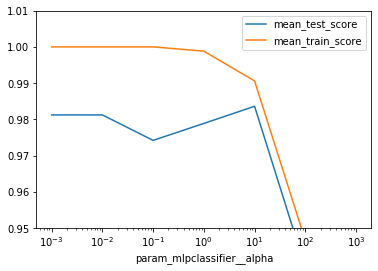

In [29]:
res.plot()
plt.xscale("log")
plt.ylim(0.95, 1.01)

In [30]:
res = results.pivot_table(index="param_mlpclassifier__alpha", values=["mean_test_score", "mean_train_score", "std_test_score", "std_train_score"])

In [31]:
res

,mean_test_score,mean_train_score,std_test_score,std_train_score
param_mlpclassifier__alpha,,,,
0.001,0.981231,1.000000,0.005720,0.000000
0.010,0.981231,1.000000,0.005720,0.000000
0.100,0.974200,1.000000,0.008717,0.000000
1.000,0.978878,0.998825,0.011516,0.001439
10.000,0.983611,0.990611,0.011869,0.002193
100.000,0.939097,0.946598,0.033973,0.002148
1000.000,0.626758,0.626760,0.004593,0.001145


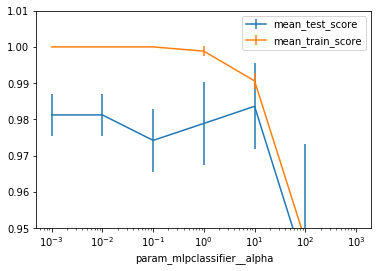

In [32]:
res.mean_test_score.plot(yerr=res.std_test_score)
res.mean_train_score.plot(yerr=res.std_train_score)
plt.xscale("log")
plt.ylim(0.95, 1.01)
plt.legend()

In [33]:
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), MLPClassifier(solver="lbfgs", random_state=1))
param_grid = {'mlpclassifier__hidden_layer_sizes':
              [(10,), (50,), (100,), (500,), (10, 10), (50, 50), (100, 100), (500, 500)]
             }
grid = GridSearchCV(pipe, param_grid,return_train_score=True)

In [34]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('mlpclassifier',
                                        MLPClassifier(activation='relu',
                                                      alpha=0.0001,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=False,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(100,),
                                                      learning_rate='con

In [35]:
results = pd.DataFrame(grid.cv_results_)

In [36]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlpclassifier__hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.039330,0.008845,0.000000,0.000000,"(10,)","{'mlpclassifier__hidden_layer_sizes': (10,)}",0.953488,0.964706,0.952941,0.964706,...,0.967168,0.017202,7,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.048290,0.005262,0.002400,0.001960,"(50,)","{'mlpclassifier__hidden_layer_sizes': (50,)}",0.976744,0.976471,0.976471,0.964706,...,0.978878,0.011516,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.075186,0.008263,0.003807,0.000387,"(100,)","{'mlpclassifier__hidden_layer_sizes': (100,)}",0.976744,0.976471,0.976471,0.988235,...,0.981231,0.005720,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.309184,0.017445,0.003883,0.000240,"(500,)","{'mlpclassifier__hidden_layer_sizes': (500,)}",0.965116,0.988235,0.952941,0.976471,...,0.971847,0.011950,6,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.047250,0.011794,0.001600,0.001960,"(10, 10)","{'mlpclassifier__hidden_layer_sizes': (10, 10)}",0.953488,0.952941,0.952941,0.964706,...,0.957756,0.005678,8,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,0.101046,0.007546,0.000800,0.001601,"(50, 50)","{'mlpclassifier__hidden_layer_sizes': (50, 50)}",0.965116,0.976471,0.952941,0.976471,...,0.974200,0.015559,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,0.168335,0.015245,0.003200,0.001600,"(100, 100)","{'mlpclassifier__hidden_layer_sizes': (100, 100)}",0.965116,0.976471,0.964706,0.988235,...,0.974200,0.008717,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,1.345602,0.213279,0.006896,0.003251,"(500, 500)","{'mlpclassifier__hidden_layer_sizes': (500, 500)}",0.976744,0.976471,0.964706,0.988235,...,0.976525,0.007441,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [37]:
res = results.pivot_table(index="param_mlpclassifier__hidden_layer_sizes", values=["mean_test_score", "mean_train_score", "std_test_score", "std_train_score"])

In [38]:
res

,mean_test_score,mean_train_score,std_test_score,std_train_score
param_mlpclassifier__hidden_layer_sizes,,,,
"(10,)",0.967168,1.0,0.017202,0.0
"(10, 10)",0.957756,1.0,0.005678,0.0
"(50,)",0.978878,1.0,0.011516,0.0
"(50, 50)",0.974200,1.0,0.015559,0.0
"(100,)",0.981231,1.0,0.005720,0.0
"(100, 100)",0.974200,1.0,0.008717,0.0
"(500,)",0.971847,1.0,0.011950,0.0
"(500, 500)",0.976525,1.0,0.007441,0.0


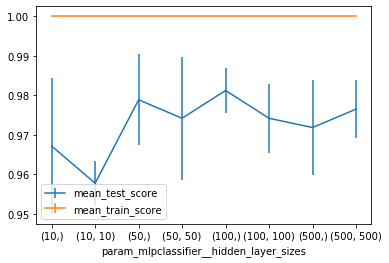

In [39]:
res.mean_test_score.plot(yerr=res.std_test_score)
res.mean_train_score.plot(yerr=res.std_train_score)
plt.legend()

In [40]:
mlp = MLPClassifier(solver="lbfgs", hidden_layer_sizes=(2,), random_state=0).fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.9976525821596244
0.958041958041958


In [41]:
mlp.coefs_[0].shape

(30, 2)

In [42]:
X_train_scaled.shape

(426, 30)

In [43]:
hidden = np.dot(X_test_scaled, mlp.coefs_[0])  + mlp.intercepts_[0]

In [44]:
hidden

array([[ 13.15 , -16.827],
       [-26.165,  28.92 ],
       [-16.108,  32.578],
       [ 24.172, -19.635],
       [-14.041,  20.258],
       [ 19.527,  -2.355],
       [-81.456,  67.824],
       [-35.976,  75.842],
       [ -3.436,  56.971],
       [ 14.338, -23.134],
       [-17.877,  53.378],
       [-17.738,  51.877],
       [  7.93 ,  -0.436],
       [ 21.565, -14.805],
       [ 35.902, -29.442],
       [ 26.002, -60.52 ],
       [ 10.739, -45.881],
       [ -2.016,  16.757],
       [-27.653, -17.978],
       [ -8.304,  21.312],
       [  6.687,  -8.273],
       [-60.714, 101.444],
       [ -2.634,  12.277],
       [ 17.749, -33.745],
       [ 15.083, -29.588],
       [ -9.664,  26.926],
       [ 26.656, -19.144],
       [ 45.379, -34.024],
       [ 30.789,  -3.296],
       [-35.377,  20.08 ],
       [ 11.184,   4.558],
       [ 20.009, -20.298],
       [  7.29 ,  -5.649],
       [ 21.457, -33.929],
       [ 22.474, -14.524],
       [ 22.239, -22.699],
       [-11.646,  26.97 ],
 

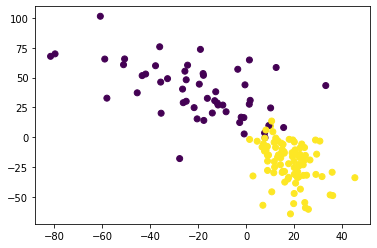

In [45]:
plt.scatter(hidden[:, 0], hidden[:, 1], c=y_test)